In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Jimmy's code below (Extract/Transform)

### EXTRACT: Store CSV into DataFrame

In [2]:
csv_file = "Resources/Data_Scientist_Salary/survey_final.csv"
read = pd.read_csv(csv_file)
df = pd.DataFrame(read)

/Users/jameswhite/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### TRANSFORM: Create new data with select columns

In [3]:
df = df.dropna()

In [4]:
df = df.reset_index(drop=True)

In [5]:
df.head()

,Year,Hobbyist,ConvertedComp,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,UndergradMajor,YearsCodePro
0,2020,Yes,116000.0,United States,MongoDB,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,JavaScript,Python;SQL,20 to 99 employees,"Computer science, computer engineering, or sof...",13
1,2020,Yes,32315.0,United Kingdom,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master's degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Very satisfied,HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,2 to 9 employees,Mathematics or statistics,4
2,2020,Yes,40070.0,United Kingdom,Firebase;MongoDB;PostgreSQL,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,Go;JavaScript;Swift;TypeScript,C#;JavaScript;Swift,"10,000 or more employees","Computer science, computer engineering, or sof...",2
3,2020,Yes,66000.0,United States,Firebase;Microsoft SQL Server,Firebase;Microsoft SQL Server,"Developer, desktop or enterprise applications;...","Associate degree (A.A., A.S., etc.)",Employed full-time,Slightly satisfied,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,100 to 499 employees,"Computer science, computer engineering, or sof...",1
4,2020,Yes,79000.0,United States,Cassandra;Elasticsearch;MariaDB;PostgreSQL;Redis,Microsoft SQL Server;PostgreSQL,"Developer, full-stack","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA,20 to 99 employees,"Computer science, computer engineering, or sof...",3


In [6]:
df = df.drop(columns = {'Hobbyist', 'DatabaseDesireNextYear', 'Year', 'LanguageDesireNextYear', 'OrgSize'})

In [25]:
df = df.rename(columns = {'ConvertedComp': 'Salary', 'JobSat': 'Job Satisfaction', 'DatabaseWorkedWith': 'Database Use', 'LanguageWorkedWith': 'Programming Language', 'UndergradMajor': 'Major', 'YearsCodePro': 'Years Coding Professionally', 'EdLevel': 'Education_Level', 'DevType': 'Developer'})
df['Salary'] = round(df['Salary'], 2)
new_data_scientist_salary_df = df
new_data_scientist_salary_df

,Salary,Country,Database Use,Developer,Education Level,Employment,Job Satisfaction,Programming Language,Major,Years Coding Professionally
0,116000.00,United States,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,Python;SQL,"Computer science, computer engineering, or sof...",13
1,32315.00,United Kingdom,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master's degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Very satisfied,HTML/CSS;Java;JavaScript;Python;SQL,Mathematics or statistics,4
2,40070.00,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,C#;JavaScript;Swift,"Computer science, computer engineering, or sof...",2
3,66000.00,United States,Firebase;Microsoft SQL Server,"Developer, desktop or enterprise applications;...","Associate degree (A.A., A.S., etc.)",Employed full-time,Slightly satisfied,HTML/CSS;JavaScript;SQL;TypeScript,"Computer science, computer engineering, or sof...",1
4,79000.00,United States,Microsoft SQL Server;PostgreSQL,"Developer, full-stack","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,C#;HTML/CSS;JavaScript;Python;SQL;VBA,"Computer science, computer engineering, or sof...",3
...,...,...,...,...,...,...,...,...,...,...
93547,15483.87,Portugal,MySQL; Oracle,Web developer,Master's degree,Employed full-time,2,Java; JavaScript; PHP; SQL; VBA,Computer science or software engineering,1 to 2 years
93548,59808.61,Norway,MongoDB,Web developer,Master's degree,Employed full-time,7,Java; JavaScript; Scala,A non-computer-focused engineering discipline,Less than a year
93549,440.46,India,MySQL,Web developer; Developer with a statistics or ...,Some college/university study without earning ...,Employed full-time,5,C; PHP,Computer science or software engineering,2 to 3 years
93550,74193.55,Netherlands,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Bachelor's degree,Employed full-time,7,Elixir; JavaScript; Python; Scala,Computer science or software engineering,5 to 6 years


In [8]:
new_df = df.groupby(df['Country'])
mean_df = new_df.mean()
mean_df['Salary'] = round(mean_df['Salary'],2)
mean_df

,Salary
Country,
Afghanistan,25234.97
Albania,23314.72
Algeria,11489.54
Andorra,35672.00
Angola,5736.00
...,...
Virgin Islands (USA),175000.00
Yemen,19632.00
Zaire,4800.00


In [9]:
new_labels = []
new_labels = mean_df.index

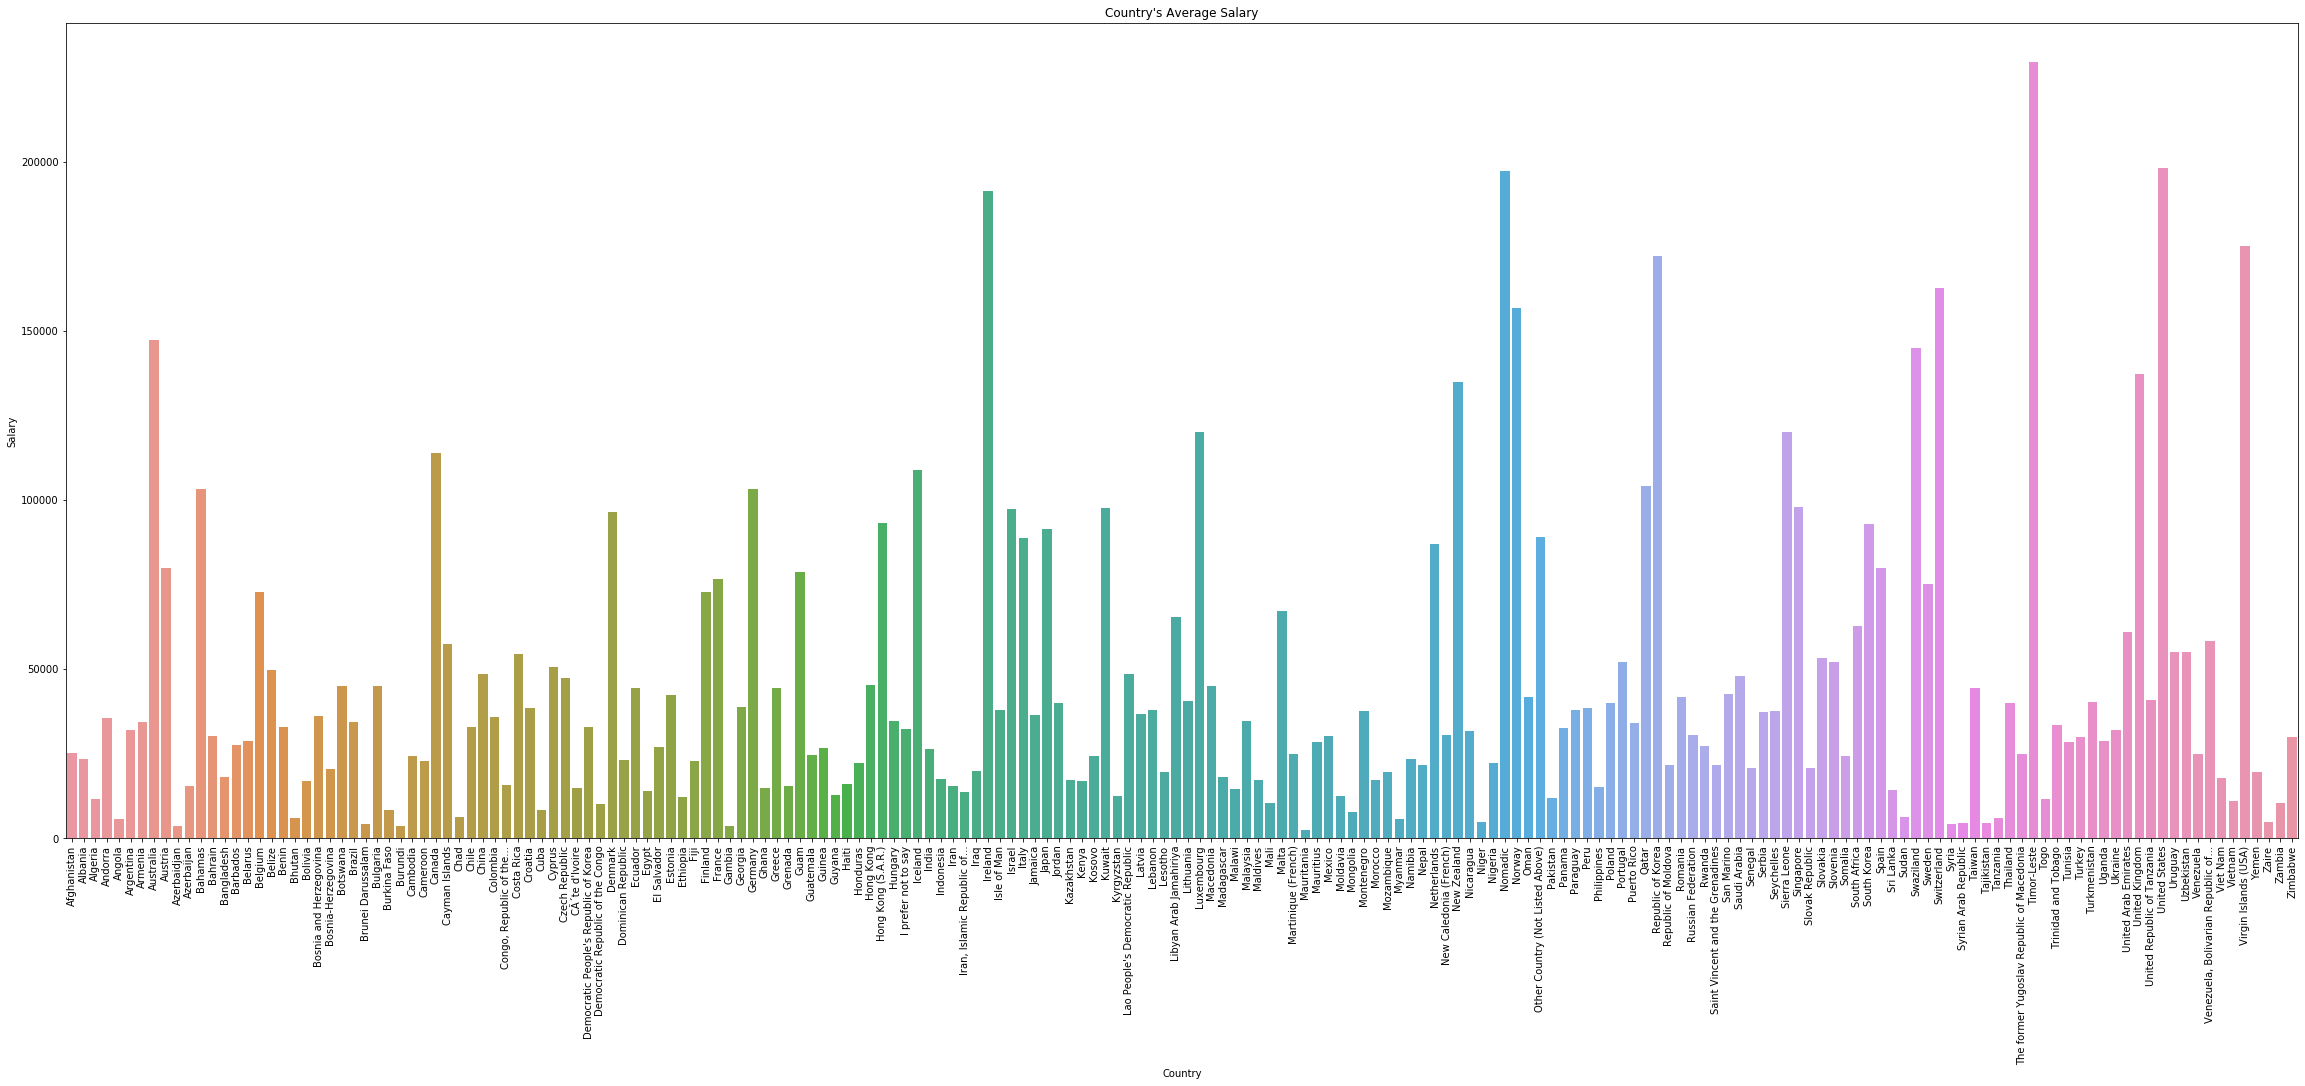

In [59]:
dims = (40, 15)
fig, ax = plt.subplots(figsize=dims)
chart = sns.barplot(x=mean_df.index, y=mean_df['Salary'])
plt.xticks(rotation=90)
plt.title("Country's Average Salary")
plt.savefig('output/country_avg_salary.png')

In [23]:
edu_df = df.groupby(df['Education Level'])
mean_edu_df = edu_df.mean()
mean_edu_df['Salary'] = round(mean_edu_df['Salary'],2)
mean_edu_df

,Salary
Education Level,
Associate degree,118542.62
"Associate degree (A.A., A.S., etc.)",110507.51
Bachelor's degree,55558.08
"Bachelor's degree (B.A., B.S., B.Eng., etc.)",100070.99
"Bachelor's degree (BA, BS, B.Eng., etc.)",129290.36
"Bachelor‚'s degree (BA, BS, B.Eng., etc.)",95048.09
Doctoral degree,82833.21
Master's degree,55653.10
"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",98520.99


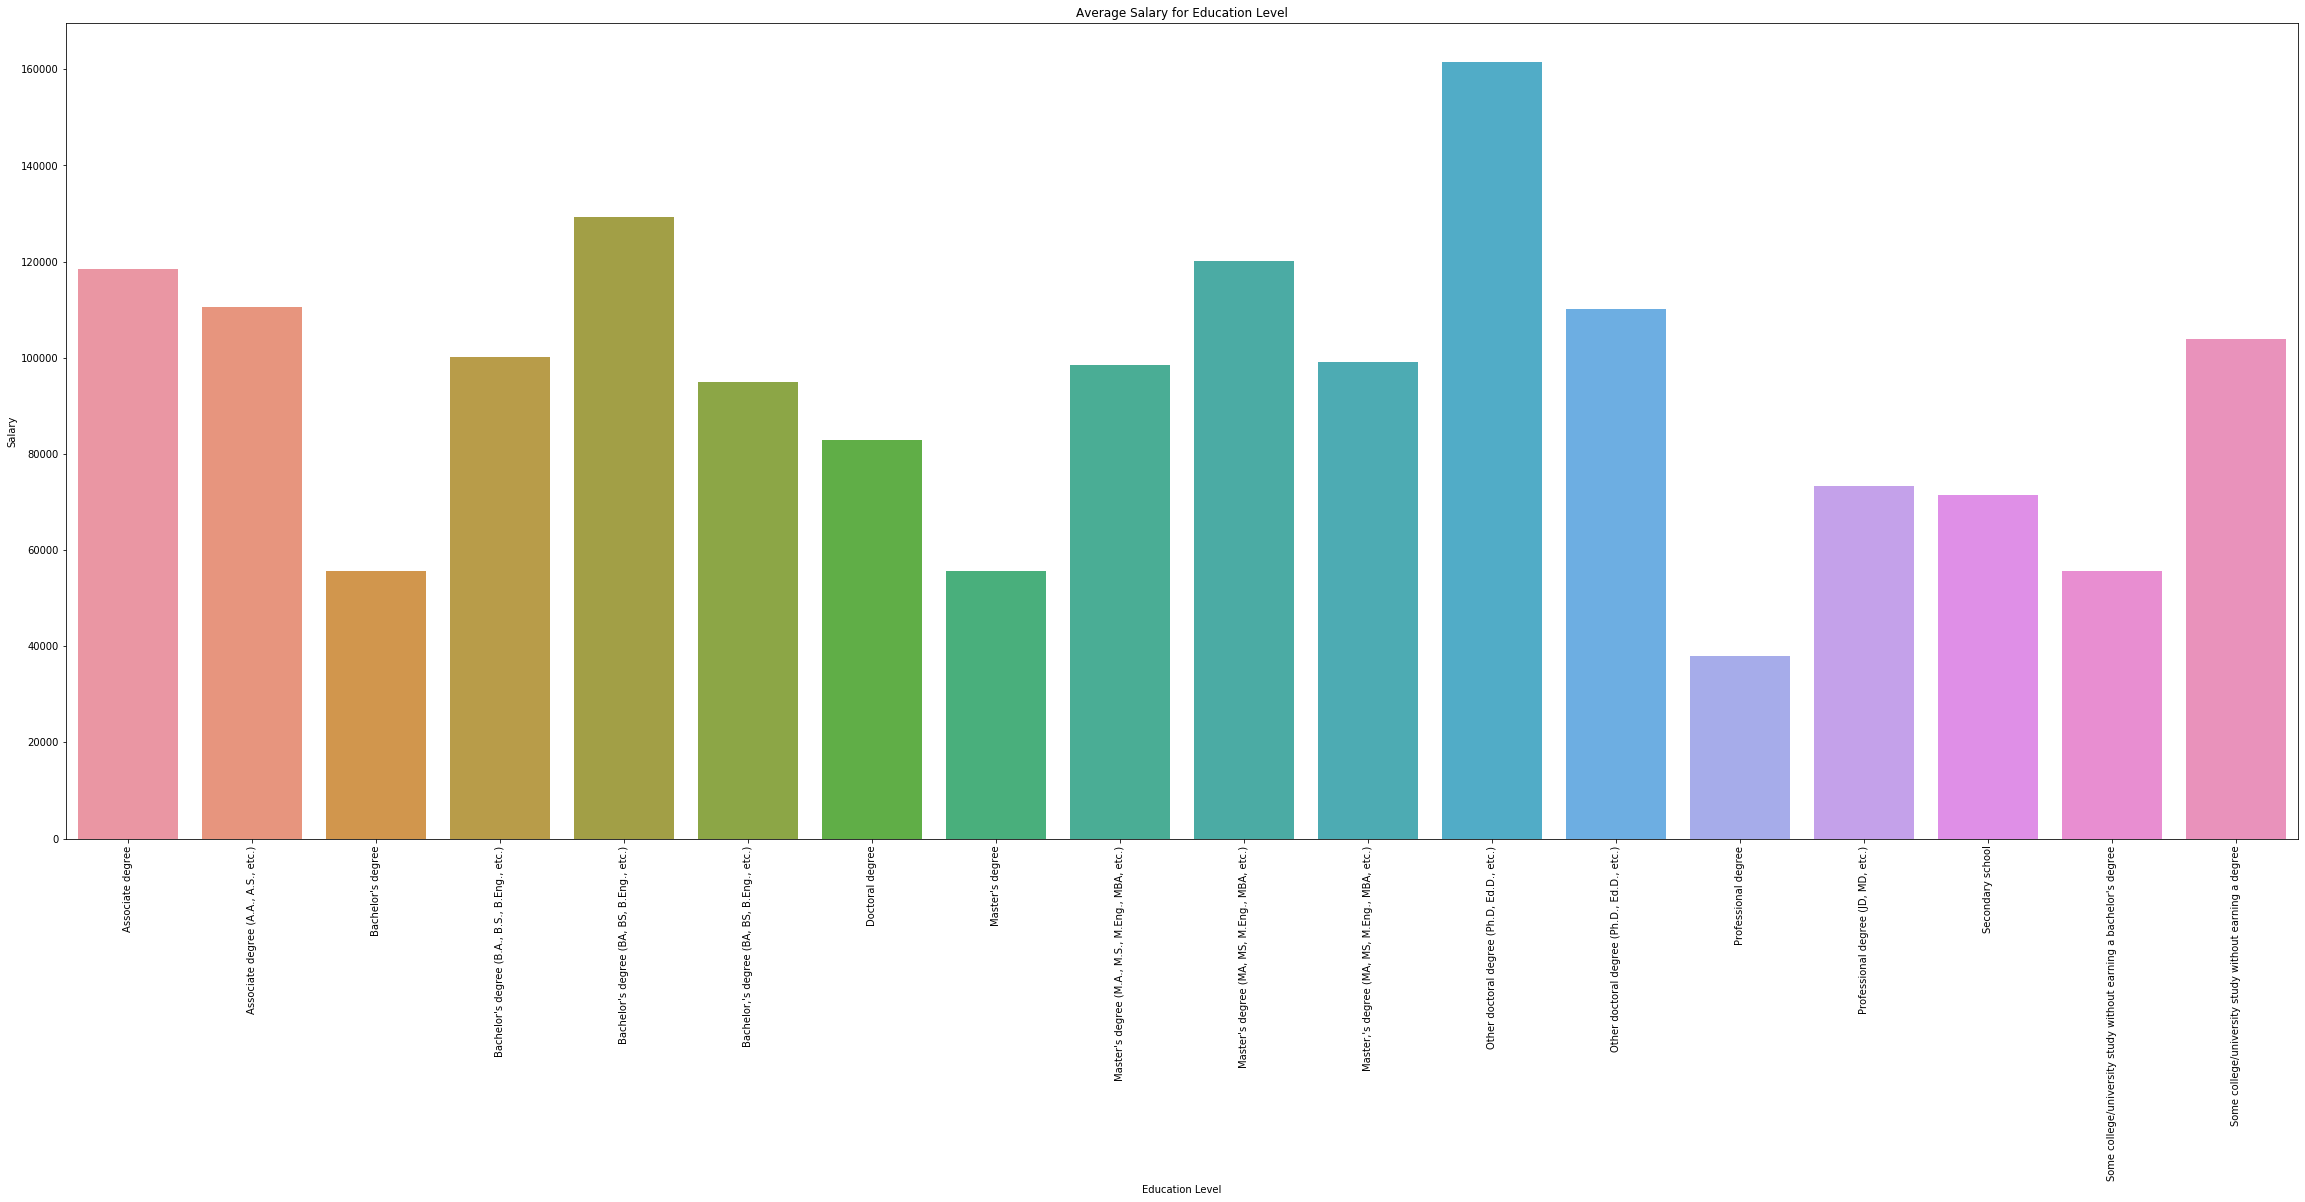

In [60]:
dims = (40, 15)
fig, ax = plt.subplots(figsize=dims)
chart2 = sns.barplot(x=mean_edu_df.index, y=mean_edu_df['Salary'])
plt.xticks(rotation=90)
plt.title("Average Salary for Education Level")
plt.savefig('output/education_level.png')

In [26]:
df['Education Level'].value_counts()

Bachelor's degree (BA, BS, B.Eng., etc.)                             20277
Bachelor‚'s degree (BA, BS, B.Eng., etc.)                            14116
Bachelor's degree (B.A., B.S., B.Eng., etc.)                         11971
Some college/university study without earning a degree               11440
Master's degree (MA, MS, M.Eng., MBA, etc.)                           9828
Master‚'s degree (MA, MS, M.Eng., MBA, etc.)                          6536
Master's degree (M.A., M.S., M.Eng., MBA, etc.)                       5739
Bachelor's degree                                                     3912
Associate degree                                                      2316
Master's degree                                                       1787
Other doctoral degree (Ph.D, Ed.D., etc.)                             1435
Some college/university study without earning a bachelor's degree     1342
Professional degree (JD, MD, etc.)                                    1300
Associate degree (A.A., A

In [48]:
# Changing the column values to reflect Sarah's DataFrame, so some comparisons may be made

df.loc[df['Education Level'] == "Bachelor's degree (BA, BS, B.Eng., etc.)", "Education Level"] = "Graduate"
df.loc[df['Education Level'] == "Bachelor‚'s degree (BA, BS, B.Eng., etc.)", "Education Level"] = "Graduate"
df.loc[df['Education Level'] == "Bachelor's degree (B.A., B.S., B.Eng., etc.)", "Education Level"] = "Graduate"
df.loc[df['Education Level'] == "Some college/university study without earning a degree"] = "High School"
df.loc[df['Education Level'] == "Master's degree (MA, MS, M.Eng., MBA, etc.)"] = "Masters"
df.loc[df['Education Level'] == "Master‚'s degree (MA, MS, M.Eng., MBA, etc.)"] = "Masters"
df.loc[df['Education Level'] == "Master's degree (M.A., M.S., M.Eng., MBA, etc.)"] = "Masters"
df.loc[df['Education Level'] == "Bachelor's degree", "Education Level"] = "Graduate"
df.loc[df['Education Level'] == "Associate degree", "Education Level"] = "Graduate"
df.loc[df['Education Level'] == "Master's degree"] = "Masters"
df.loc[df['Education Level'] == "Other doctoral degree (Ph.D, Ed.D., etc.)"] = "Phd"
df.loc[df['Education Level'] == "Some college/university study without earning a bachelor's degree"] = "High School"
df.loc[df['Education Level'] == "Professional degree (JD, MD, etc.)"] = "Phd"
df.loc[df['Education Level'] == "Associate degree (A.A., A.S., etc.)"] = "Graduate"
df.loc[df['Education Level'] == "Other doctoral degree (Ph.D., Ed.D., etc.)"] = "Phd"
df.loc[df['Education Level'] == "Doctoral degree"] = "Phd"
df.loc[df['Education Level'] == "Professional degree"] = "Phd"
df.loc[df['Education Level'] == "Secondary school"] = "High School"

In [50]:
df

,Salary,Country,Database Use,Developer,Education Level,Employment,Job Satisfaction,Programming Language,Major,Years Coding Professionally
0,116000,United States,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Graduate,Employed full-time,Slightly dissatisfied,Python;SQL,"Computer science, computer engineering, or sof...",13
1,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters
2,40070,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Graduate,Employed full-time,Slightly dissatisfied,C#;JavaScript;Swift,"Computer science, computer engineering, or sof...",2
3,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
4,79000,United States,Microsoft SQL Server;PostgreSQL,"Developer, full-stack",Graduate,Employed full-time,Slightly dissatisfied,C#;HTML/CSS;JavaScript;Python;SQL;VBA,"Computer science, computer engineering, or sof...",3
...,...,...,...,...,...,...,...,...,...,...
93547,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters
93548,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters,Masters
93549,High School,High School,High School,High School,High School,High School,High School,High School,High School,High School
93550,74193.6,Netherlands,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Graduate,Employed full-time,7,Elixir; JavaScript; Python; Scala,Computer science or software engineering,5 to 6 years


## Sarah's code below (Extract/Transform)

### EXTRACT: Store CSV into DataFrame

In [11]:
csv_file = "Resources/HR_Analytics_DB/aug_train.csv"
hr_analytics_df = pd.read_csv(csv_file)
hr_analytics_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### TRANSFORM: Create new data with select columns

In [12]:
new_hr_analytics_df = hr_analytics_df[["enrollee_id", "education_level", "experience", "last_new_job", "target"]].copy()
new_hr_analytics_df.head()

,enrollee_id,education_level,experience,last_new_job,target
0,8949,Graduate,>20,1,1.0
1,29725,Graduate,15,>4,0.0
2,11561,Graduate,5,never,0.0
3,33241,Graduate,<1,never,1.0
4,666,Masters,>20,4,0.0


In [13]:
renamed_hr_analytics_df = new_hr_analytics_df.rename(columns = {"enrollee_id":"Candidate_ID", 
                                      "education_level":"Education_Level",
                                      "experience":"Years_Experience",
                                      "last_new_job":"Years_Tenure",
                                      "target":"Active"})
renamed_hr_analytics_df

,Candidate_ID,Education_Level,Years_Experience,Years_Tenure,Active
0,8949,Graduate,>20,1,1.0
1,29725,Graduate,15,>4,0.0
2,11561,Graduate,5,never,0.0
3,33241,Graduate,<1,never,1.0
4,666,Masters,>20,4,0.0
...,...,...,...,...,...
19153,7386,Graduate,14,1,1.0
19154,31398,Graduate,14,4,1.0
19155,24576,Graduate,>20,4,0.0
19156,5756,High School,<1,2,0.0


In [14]:
renamed_hr_analytics_df["Years_Tenure"] = renamed_hr_analytics_df["Years_Tenure"].replace({"never":"0"})

In [15]:
renamed_hr_analytics_df["Active"] = renamed_hr_analytics_df["Active"].apply(str)
renamed_hr_analytics_df["Active"] = renamed_hr_analytics_df["Active"].str.replace("0.0", "No")
renamed_hr_analytics_df["Active"] = renamed_hr_analytics_df["Active"].str.replace("1.0", "Yes")

In [16]:
renamed_hr_analytics_df.dtypes

Candidate_ID         int64
Education_Level     object
Years_Experience    object
Years_Tenure        object
Active              object
dtype: object

In [17]:
renamed_hr_analytics_df.count()

Candidate_ID        19158
Education_Level     18698
Years_Experience    19093
Years_Tenure        18735
Active              19158
dtype: int64

In [18]:
dropped_hr_analytics_df = renamed_hr_analytics_df.dropna(how= "any")
dropped_hr_analytics_df

,Candidate_ID,Education_Level,Years_Experience,Years_Tenure,Active
0,8949,Graduate,>20,1,Yes
1,29725,Graduate,15,>4,No
2,11561,Graduate,5,0,No
3,33241,Graduate,<1,0,Yes
4,666,Masters,>20,4,No
...,...,...,...,...,...
19153,7386,Graduate,14,1,Yes
19154,31398,Graduate,14,4,Yes
19155,24576,Graduate,>20,4,No
19156,5756,High School,<1,2,No


In [22]:
Final_hr_analytics_df = dropped_hr_analytics_df.sort_values(by = "Candidate_ID")
Final_hr_analytics_df

,Candidate_ID,Education_Level,Years_Experience,Years_Tenure,Active
17321,1,High School,2,0,No
6730,2,Phd,15,3,Yes
10024,4,Masters,9,>4,No
15817,5,Masters,10,1,No
4552,7,Masters,13,1,No
...,...,...,...,...,...
17935,33375,Graduate,16,1,No
5009,33376,Masters,8,4,No
3351,33377,Graduate,10,2,No
4756,33379,Graduate,18,2,No


## Luis's code below (Load)

### Connect to postgres database: data_scientist_DB

In [20]:
from config import key 
rds_connection_string = f"postgres:{key}@localhost:5432/data_scientist_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

### Check for tables already created

In [21]:
# Tables have already been created with create_table_statements.sql
engine.table_names()

OperationalError: (psycopg2.OperationalError) FATAL:  password authentication failed for user "postgres"

(Background on this error at: http://sqlalche.me/e/13/e3q8)

### Combine dataframes into a single one

In [ ]:
combined_df = pd.merge(new_data_scientist_salary_df, Final_hr_analytics_df, on="field1") 

### LOAD: Use pandas to load combined DataFrame into database

In [ ]:
combined_df.to_sql(name='data_scientist_tbl', con=engine, if_exists='append', index=False)

### Confirm data has been added by querying the customer_name table
* NOTE: can also check using pgAdmin

In [ ]:
pd.read_sql_query('select * from data_scientist_tbl', con=engine).head()